<center><h1>Wang_Timothy_HW5</h1></center>
<br>
<br>

Name: Timothy Wang
<br>
Github Username: timothyswang
<br>
USC ID: 2697040790

## 1. Decision Trees as Interpretable Models

Import packages

In [76]:
import os
import pandas as pd
import numpy as np

import skmultilearn

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import _tree
from sklearn.model_selection import cross_val_score
from scipy.io import arff #[9]

import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import xgboost as xgb

### (a) Obtain Data

Get the Accute Inamations Data Set

In [2]:
#[1]
diagnosis_df = pd.read_csv("../data/diagnosis.csv", names=["patient_temp", "nausea", "lumbar_pain", "urine_pushing", "micturition_pain", "urethra_burning", "d1_inflamation", "d2_nephritis"])

#[2]
diagnosis_df.loc[diagnosis_df["nausea"] == "no", "nausea"] = 0
diagnosis_df.loc[diagnosis_df["nausea"] == "yes", "nausea"] = 1

diagnosis_df.loc[diagnosis_df["lumbar_pain"] == "no", "lumbar_pain"] = 0
diagnosis_df.loc[diagnosis_df["lumbar_pain"] == "yes", "lumbar_pain"] = 1

diagnosis_df.loc[diagnosis_df["urine_pushing"] == "no", "urine_pushing"] = 0
diagnosis_df.loc[diagnosis_df["urine_pushing"] == "yes", "urine_pushing"] = 1

diagnosis_df.loc[diagnosis_df["micturition_pain"] == "no", "micturition_pain"] = 0
diagnosis_df.loc[diagnosis_df["micturition_pain"] == "yes", "micturition_pain"] = 1

diagnosis_df.loc[diagnosis_df["urethra_burning"] == "no", "urethra_burning"] = 0
diagnosis_df.loc[diagnosis_df["urethra_burning"] == "yes", "urethra_burning"] = 1

diagnosis_df.loc[diagnosis_df["d1_inflamation"] == "no", "d1_inflamation"] = 0
diagnosis_df.loc[diagnosis_df["d1_inflamation"] == "yes", "d1_inflamation"] = 1

diagnosis_df.loc[diagnosis_df["d2_nephritis"] == "no", "d2_nephritis"] = 0
diagnosis_df.loc[diagnosis_df["d2_nephritis"] == "yes", "d2_nephritis"] = 1

#[3]
diagnosis_df["nausea"] = diagnosis_df["nausea"].astype("int64")
diagnosis_df["lumbar_pain"] = diagnosis_df["lumbar_pain"].astype("int64")
diagnosis_df["urine_pushing"] = diagnosis_df["urine_pushing"].astype("int64")
diagnosis_df["micturition_pain"] = diagnosis_df["micturition_pain"].astype("int64")
diagnosis_df["urethra_burning"] = diagnosis_df["urethra_burning"].astype("int64")
diagnosis_df["d1_inflamation"] = diagnosis_df["d1_inflamation"].astype("int64")
diagnosis_df["d2_nephritis"] = diagnosis_df["d2_nephritis"].astype("int64")

print(diagnosis_df)

     patient_temp  nausea  lumbar_pain  urine_pushing  micturition_pain   
0            35.5       0            1              0                 0  \
1            35.9       0            0              1                 1   
2            35.9       0            1              0                 0   
3            36.0       0            0              1                 1   
4            36.0       0            1              0                 0   
..            ...     ...          ...            ...               ...   
115          41.4       0            1              1                 0   
116          41.5       0            0              0                 0   
117          41.5       1            1              0                 1   
118          41.5       0            1              1                 0   
119          41.5       0            1              1                 0   

     urethra_burning  d1_inflamation  d2_nephritis  
0                  0               0          

### (b) Build a decision tree

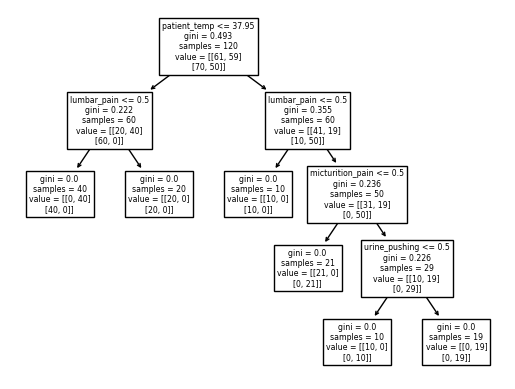

In [3]:
#[4]
dt_classifier = DecisionTreeClassifier()

x_dt = diagnosis_df[["patient_temp", "nausea", "lumbar_pain", "urine_pushing", "micturition_pain", "urethra_burning"]]
y_dt = diagnosis_df[["d1_inflamation", "d2_nephritis"]]

dt_classifier.fit(X=x_dt,y=y_dt)

#[5]
tree.plot_tree(dt_classifier, feature_names=["patient_temp", "nausea", "lumbar_pain", "urine_pushing", "micturition_pain", "urethra_burning"], class_names=["d1_inflamation", "d2_nephritis"])
plt.show()

### (c) Convert the decision rules

In [4]:
#[6] Instructions allow me to use this code specifically:
def tree_to_pseudo(tree, feature_names):
	"""
	Outputs a decision tree model as if/then pseudocode
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as pseudocode
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	left = tree.tree_.children_left
	right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	features = [feature_names[i] for i in tree.tree_.feature]
	value = tree.tree_.value

	def recurse(left, right, threshold, features, node, depth=0):
		indent = "  " * depth
		if (threshold[node] != -2):
			print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
			if left[node] != -1:
				recurse (left, right, threshold, features, left[node], depth+1)
				print(indent,"} else {")
				if right[node] != -1:
					recurse (left, right, threshold, features, right[node], depth+1)
				print(indent,"}")
		else:
			print(indent,"return " + str(value[node]))

	recurse(left, right, threshold, features, 0)

tree_to_pseudo(dt_classifier, feature_names=["patient_temp", "nausea", "lumbar_pain", "urine_pushing", "micturition_pain", "urethra_burning"])

 if ( patient_temp <= 37.95000076293945 ) {
   if ( lumbar_pain <= 0.5 ) {
     return [[ 0. 40.]
 [40.  0.]]
   } else {
     return [[20.  0.]
 [20.  0.]]
   }
 } else {
   if ( lumbar_pain <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     if ( micturition_pain <= 0.5 ) {
       return [[21.  0.]
 [ 0. 21.]]
     } else {
       if ( urine_pushing <= 0.5 ) {
         return [[10.  0.]
 [ 0. 10.]]
       } else {
         return [[ 0. 19.]
 [ 0. 19.]]
       }
     }
   }
 }


In [5]:
#Decision tree and decision rules with cost-complexity pruning.
#[4]
ccp_dt = DecisionTreeClassifier()

#[7]
ccp_path = ccp_dt.cost_complexity_pruning_path(X=x_dt, y=y_dt)
ccp_alpha_list = ccp_path.ccp_alphas
#My possible alpha values:
print(ccp_alpha_list)

[0.         0.04908333 0.07947222 0.11111111 0.20423611]


In [6]:
#Cross Validation to find best alpha value to use.

accuracy_array = []
for this_alpha in ccp_alpha_list:
    #[4]
    this_alpha_classifier = DecisionTreeClassifier(ccp_alpha=this_alpha)
    #[8]
    this_alpha_scores = cross_val_score(estimator=this_alpha_classifier, X=x_dt, y=y_dt, cv=5)

    accuracy_array.append(this_alpha_scores.mean())

print(accuracy_array)

print(np.max(accuracy_array))
print(np.argmax(accuracy_array))


[0.95, 0.7416666666666667, 0.7083333333333333, 0.5666666666666667, 0.2]
0.95
0


The best alpha is when alpha = 0.

As this could overfit, I will use the third best alpha, which is when alpha = 0.07947222.

(The second best alpha doesn't appear to prune any nodes.)

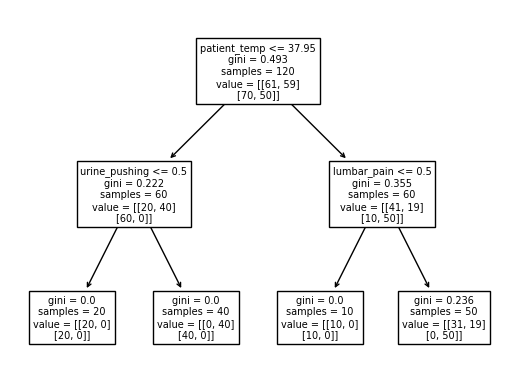

In [7]:
#[4]
dt_final = DecisionTreeClassifier(ccp_alpha=0.07947222)

dt_final.fit(X=x_dt,y=y_dt)

#[5]
tree.plot_tree(dt_final, feature_names=["patient_temp", "nausea", "lumbar_pain", "urine_pushing", "micturition_pain", "urethra_burning"], class_names=["d1_inflamation", "d2_nephritis"])
plt.show()

In [8]:
#[6]
tree_to_pseudo(dt_final, feature_names=["patient_temp", "nausea", "lumbar_pain", "urine_pushing", "micturition_pain", "urethra_burning"])

 if ( patient_temp <= 37.95000076293945 ) {
   if ( urine_pushing <= 0.5 ) {
     return [[20.  0.]
 [20.  0.]]
   } else {
     return [[ 0. 40.]
 [40.  0.]]
   }
 } else {
   if ( lumbar_pain <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     return [[31. 19.]
 [ 0. 50.]]
   }
 }


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [51]:
#[9]
#Note: I created a new .arff file to help load the data. In creating this new .arff file, I manually removed the non-predictive features (the first five features in the dataset).
communities_raw_data = arff.loadarff("../data/communities.arff")
communities_data = pd.DataFrame(communities_raw_data[0])

#The imputation method that I will use is replacing all NaN (missing) values with the mean of all the values in that column.
#[10]
communities_data = communities_data.fillna(communities_data.mean())

communities_train = communities_data.iloc[0:1495]
communities_test = communities_data.iloc[1495:]

#[24]
stand_communities_data = pd.DataFrame(StandardScaler().fit_transform(communities_data), columns=communities_data.columns)
stand_communities_train = stand_communities_data.iloc[0:1495]
stand_communities_test = stand_communities_data.iloc[1495:]

### (b) Missing values

In [10]:
#I filled in missing values in the cell above. (See line 8.)

#Test:

print(communities_data["PolicBudgPerPop"])

0       0.140000
1       0.195078
2       0.195078
3       0.195078
4       0.195078
          ...   
1989    0.195078
1990    0.195078
1991    0.280000
1992    0.180000
1993    0.130000
Name: PolicBudgPerPop, Length: 1994, dtype: float64


### (c) Plot a correlation matrix

In [11]:
#[11]
train_corr_matrix = communities_train.corr()
print(train_corr_matrix)

#[12]
train_corr_matrix.to_excel("correlation_matrix.xlsx")

#Note -- See correlation_matrix.xlsx (in the notebook directory) for the full correlation matrix.

                     population  householdsize  racepctblack  racePctWhite   
population             1.000000      -0.040404      0.242144     -0.306023  \
householdsize         -0.040404       1.000000     -0.068374     -0.243565   
racepctblack           0.242144      -0.068374      1.000000     -0.793431   
racePctWhite          -0.306023      -0.243565     -0.793431      1.000000   
racePctAsian           0.168868       0.209848     -0.104912     -0.270829   
...                         ...            ...           ...           ...   
LemasPctPolicOnPatr   -0.025145      -0.030790     -0.095939      0.058860   
LemasGangUnitDeploy    0.056257       0.006218      0.029114     -0.056293   
LemasPctOfficDrugUn    0.464459      -0.086315      0.257781     -0.272366   
PolicBudgPerPop       -0.026309      -0.018727      0.035458     -0.021934   
ViolentCrimesPerPop    0.364245      -0.031156      0.644094     -0.690614   

                     racePctAsian  racePctHisp  agePct12t21  ag

<Axes: >

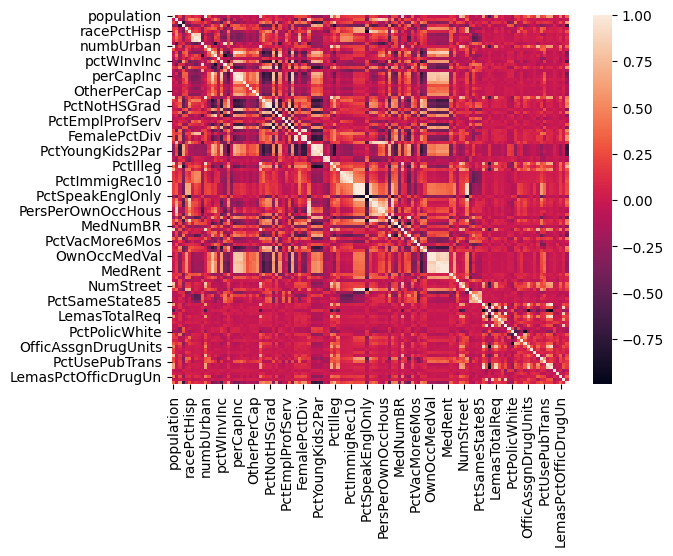

In [12]:
#[13]
seaborn.heatmap(train_corr_matrix)

### (d) Calculate the Coefficient of Variation CV

In [13]:
#[14] #[15]
cv_calc = lambda input: np.std(input, ddof=1)/np.mean(input)
communities_train_cv_df = communities_train.apply(cv_calc)

print(communities_train_cv_df)

population             2.241105
householdsize          0.355800
racepctblack           1.428885
racePctWhite           0.330213
racePctAsian           1.359100
                         ...   
LemasPctPolicOnPatr    0.117988
LemasGangUnitDeploy    0.371002
LemasPctOfficDrugUn    2.552946
PolicBudgPerPop        0.320035
ViolentCrimesPerPop    0.987909
Length: 123, dtype: float64


### (e) Scatter plots and box plots for highest CV features

In [14]:
#Square root of 128 = 11.313708499
#So we choose 11 features
#[16]
train_largest_cv = communities_train_cv_df.nlargest(n=11)
print(train_largest_cv)

NumStreet              4.292923
NumInShelters          3.470952
NumIlleg               3.058964
NumImmig               2.926635
LemasPctOfficDrugUn    2.552946
NumUnderPov            2.342443
population             2.241105
numbUrban              2.038461
HousVacant             1.968467
LandArea               1.645408
racePctHisp            1.612091
dtype: float64


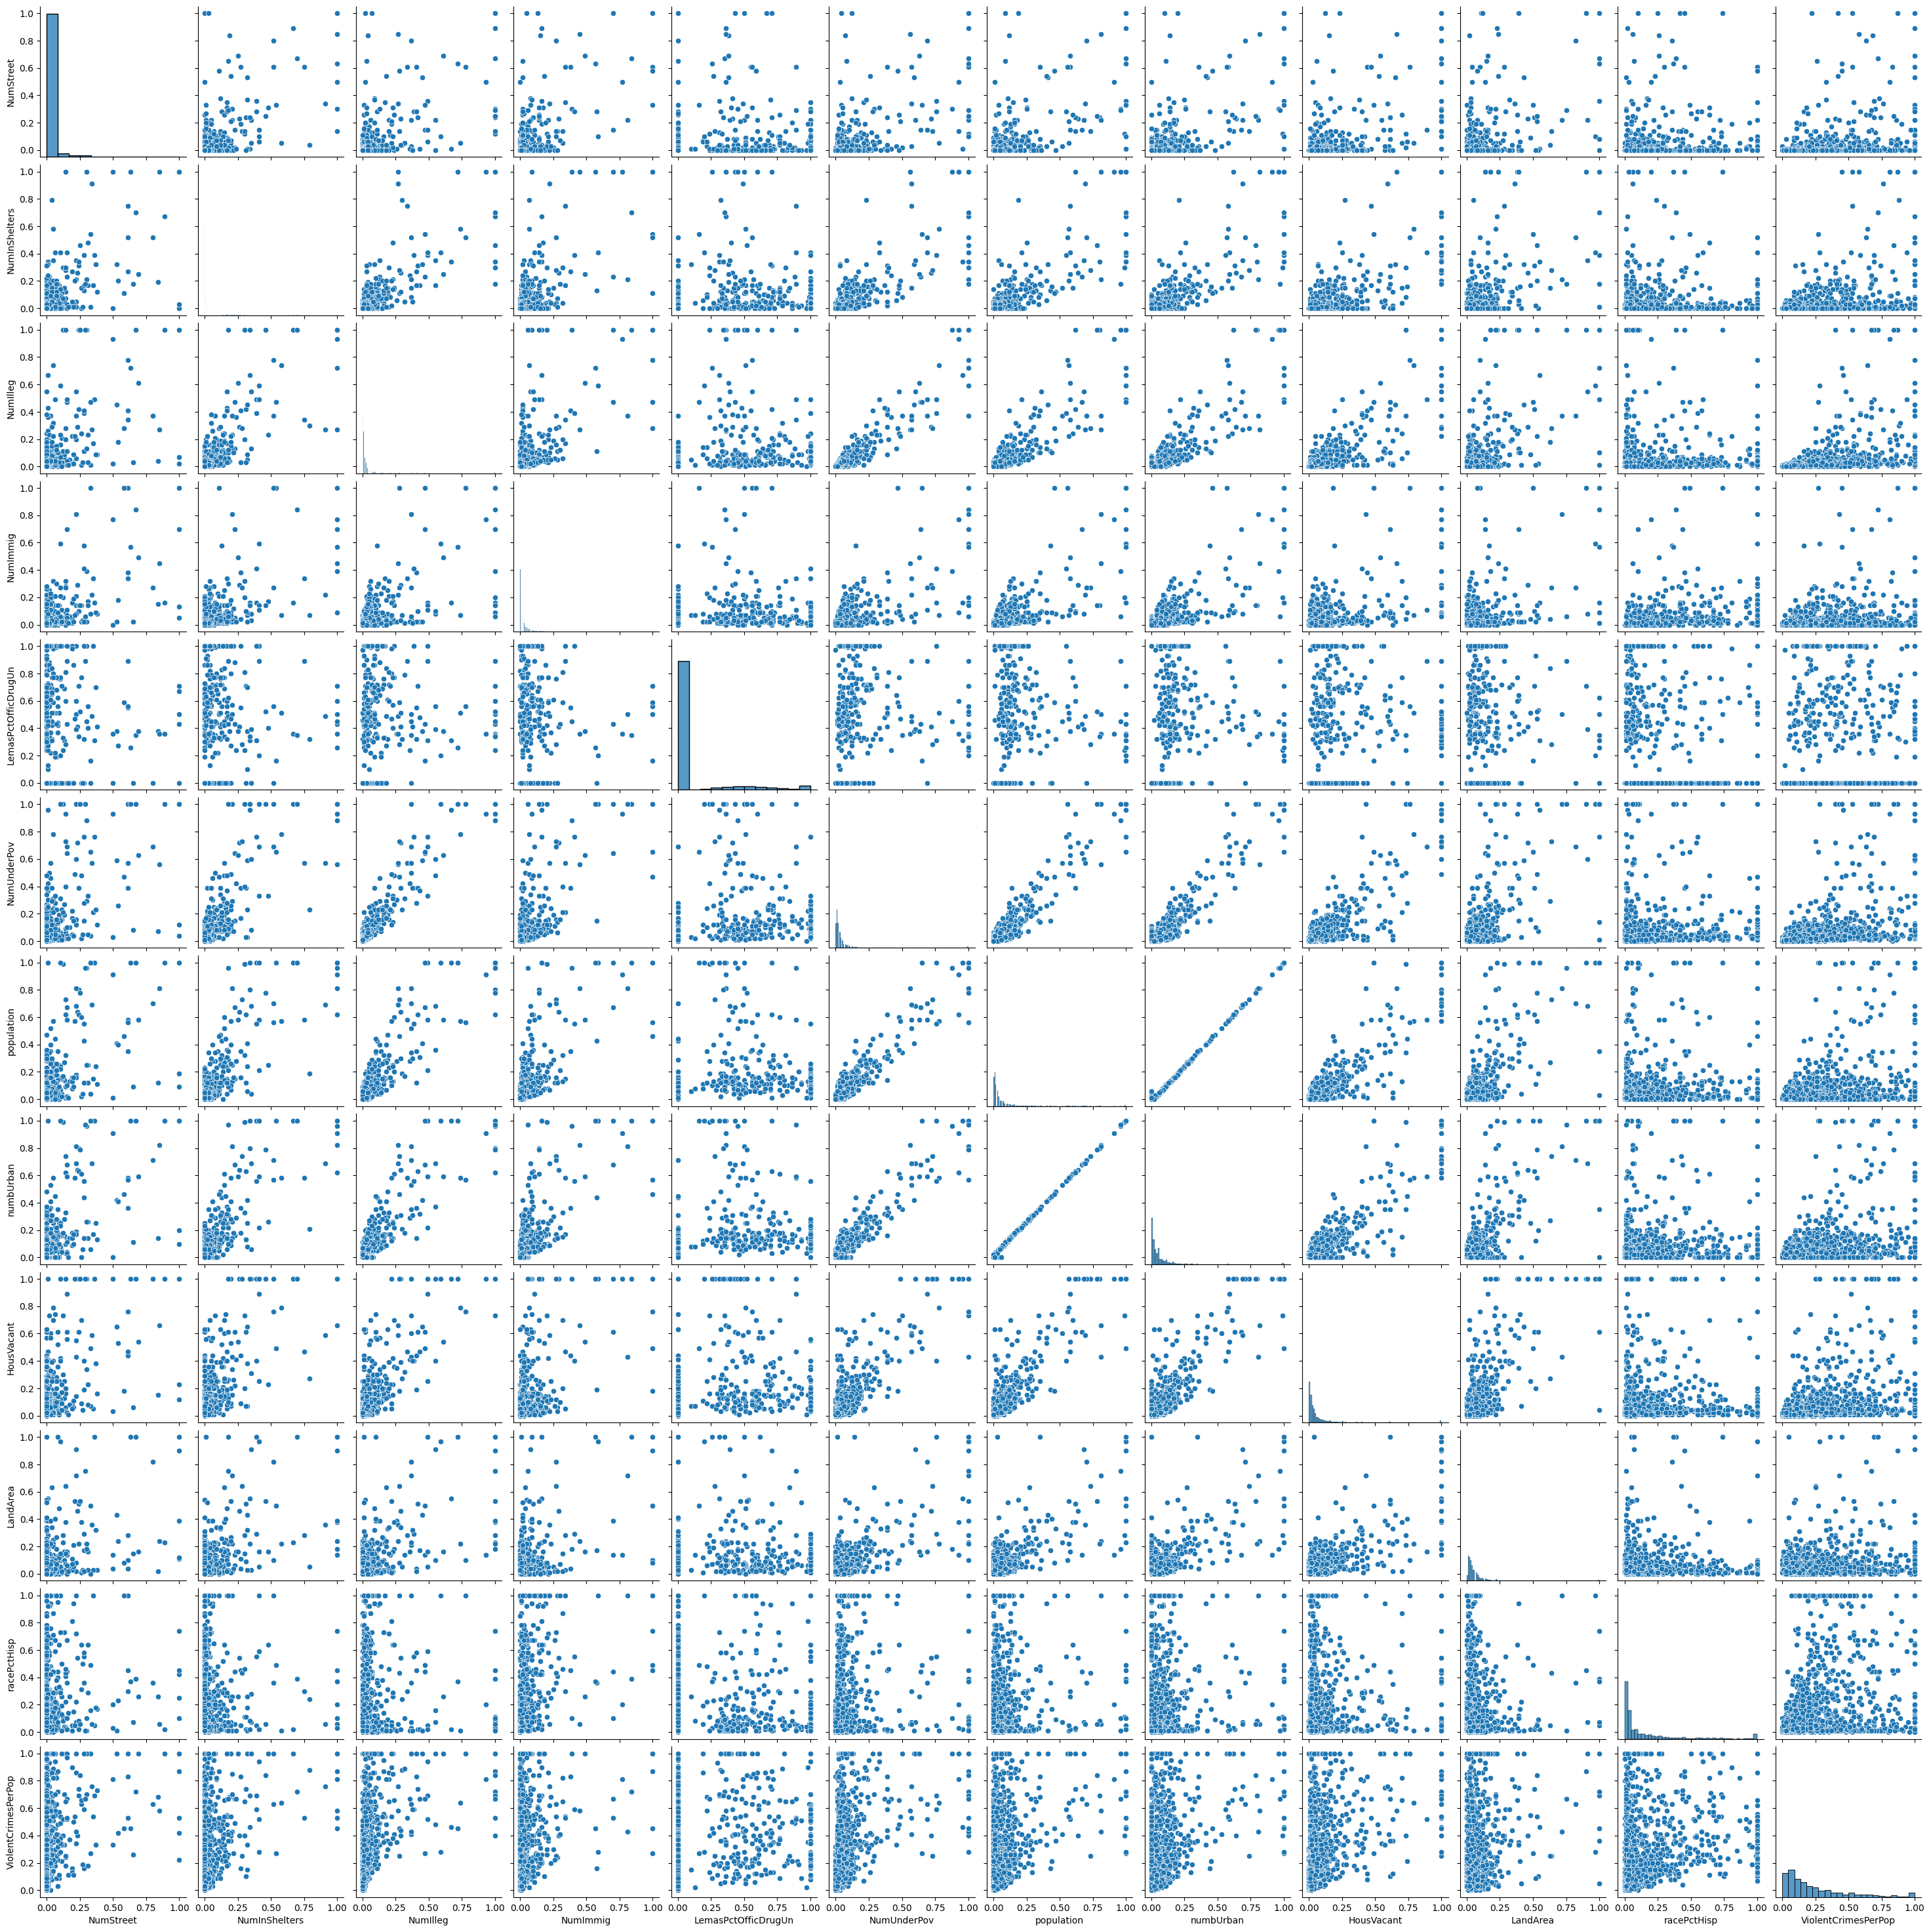

In [15]:
largest_cv_plot_data = communities_train[["NumStreet", "NumInShelters", "NumIlleg", "NumImmig", "LemasPctOfficDrugUn", "NumUnderPov", "population", "numbUrban", "HousVacant", "LandArea", "racePctHisp", "ViolentCrimesPerPop"]]

#[17]
seaborn.pairplot(data=largest_cv_plot_data)

#I added the target label "ViolentCrimesPerPop" as reference

<Axes: >

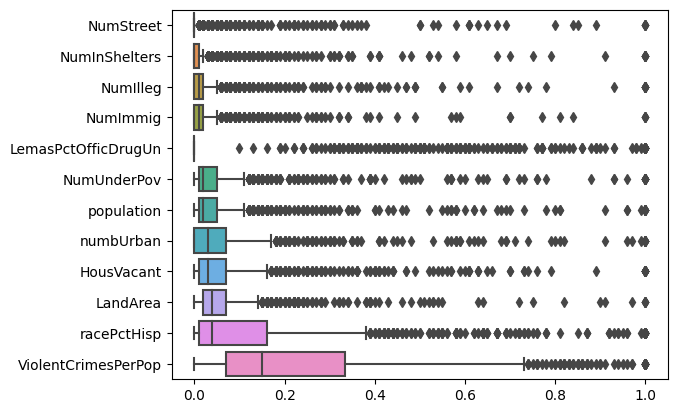

In [16]:
#[18]
seaborn.boxplot(data=largest_cv_plot_data, orient="h")

Looking at the scatterplots -- especially the bottom row where each of the 11 features are being compared against the target label "ViolentCrimesPerPop" -- there do not appear to be any feature that has a strong correlation with "ViolentCrimesPerPopulation". (The only very strong correlation appears to be numburban vs population.) Thus, I do not feel comfortable drawing any major conclusions about the significance of any of the features, just be visual inspection of the scatterplots.

### (f) Fit a linear model

In [52]:
x_train = communities_train
#[19]
x_train = x_train.drop(["ViolentCrimesPerPop"], axis=1)
y_train = communities_train["ViolentCrimesPerPop"]

x_test = communities_test
#[19]
x_test = x_test.drop(["ViolentCrimesPerPop"], axis=1)
y_test = communities_test["ViolentCrimesPerPop"]

#Standardized data
stand_x_train = stand_communities_train
#[19]
stand_x_train = stand_x_train.drop(["ViolentCrimesPerPop"], axis=1)
stand_y_train = stand_communities_train["ViolentCrimesPerPop"]

stand_x_test = stand_communities_test
#[19]
stand_x_test = stand_x_test.drop(["ViolentCrimesPerPop"], axis=1)
stand_y_test = stand_communities_test["ViolentCrimesPerPop"]


In [22]:
#[20]
linear_model = LinearRegression().fit(X=x_train, y=y_train)

linear_model_predict_y = linear_model.predict(X=x_test)

#[21]
linear_model_MSE = mean_squared_error(y_true=y_test, y_pred=linear_model_predict_y)

print(linear_model_MSE)

0.7897255274384746


The Mean Squared Test Error for our linear model is 0.7897255274384746.

### (g) Fit a ridge regression model

In [27]:
#Possible lambda values:
ridge_lamdas = [2.8, 2.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 3.0, 4.0, 5.0]

ridge_accuracy_array = []
for this_lambda in ridge_lamdas:
    #[22]
    this_lambda_model = Ridge(alpha=this_lambda)
    #[8]
    this_lambda_scores = cross_val_score(estimator=this_lambda_model, X=x_train, y=y_train, cv=5)

    ridge_accuracy_array.append(this_lambda_scores.mean())

print(ridge_accuracy_array)
print(np.max(ridge_accuracy_array))
print(np.argmax(ridge_accuracy_array))

[0.6627337699464724, 0.6627119861397628, 0.6627660062046695, 0.6627815272827179, 0.6627898716264978, 0.6627919932556503, 0.6627887004552298, 0.6627806818600231, 0.6626877234847472, 0.6623580919910601, 0.6619566777705328]
0.6627919932556503
5


After doing some testing, it appears that a lambda value of 2.3 is the best.

In [37]:
#[22]
ridge_model = Ridge(alpha=2.3).fit(X=x_train, y=y_train)
ridge_model_predict_y = ridge_model.predict(X=x_test)

#[21]
ridge_model_MSE = mean_squared_error(y_true=y_test, y_pred=ridge_model_predict_y)
print(ridge_model_MSE)

0.017603732283718494


The Mean Squared Test Error for our Ridge Regression model is 0.017603732283718494.

### (h) Fit a LASSO model

NON-STANDARDIZED

In [41]:
#Possible lambda values:
lasso_lamdas = [0.001, 0.01, .1, .2, .25, .5, .75, 1.0, 2.0]

lasso_accuracy_array = []
for this_lambda in lasso_lamdas:
    #[23]
    this_lambda_model = Lasso(alpha=this_lambda)
    #[8]
    this_lambda_scores = cross_val_score(estimator=this_lambda_model, X=x_train, y=y_train, cv=5)

    lasso_accuracy_array.append(this_lambda_scores.mean())

print(lasso_accuracy_array)
print(np.max(lasso_accuracy_array))
print(np.argmax(lasso_accuracy_array))

[0.6555304712624016, 0.5664045007547136, -0.0018993870504438349, -0.0018993870504438349, -0.0018993870504438349, -0.0018993870504438349, -0.0018993870504438349, -0.0018993870504438349, -0.0018993870504438349]
0.6555304712624016
0


After doing some testing, it appears that a lambda score of 0.001 appears to be the best.

In [43]:
#[23]
non_std_lasso_model = Lasso(alpha=0.001).fit(X=x_train, y=y_train)

non_std_lasso_pred_y = non_std_lasso_model.predict(X=x_test)

#[21]
non_std_lasso_MSE = mean_squared_error(y_true=y_test, y_pred=non_std_lasso_pred_y)
print(non_std_lasso_MSE)
#[23]
print(non_std_lasso_model.feature_names_in_)

0.017545287811568618
['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'PctOccupManu' 'PctOccupMgmtProf' 'MalePctDivorce'
 'MalePctNevMarr' 'FemalePctDiv' 'TotalPctDiv' 'PersPerFam' 'PctFam2Par'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'PctWorkMomYoungKids'
 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig' 'PctImmigRecent'
 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10' 'PctRecentImmig'
 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10' 'PctSpeakEnglOnly'
 'PctNotSpeakEnglWell' 'PctLargHouseFam' 'PctLargHouseOccup'
 'PersPerOccupHous'

For non-standardized features, the Mean Square Test Error for our lasso model is 0.017545287811568618.

The features used are:

['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'PctOccupManu' 'PctOccupMgmtProf' 'MalePctDivorce'
 'MalePctNevMarr' 'FemalePctDiv' 'TotalPctDiv' 'PersPerFam' 'PctFam2Par'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'PctWorkMomYoungKids'
 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig' 'PctImmigRecent'
 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10' 'PctRecentImmig'
 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10' 'PctSpeakEnglOnly'
 'PctNotSpeakEnglWell' 'PctLargHouseFam' 'PctLargHouseOccup'
 'PersPerOccupHous' 'PersPerOwnOccHous' 'PersPerRentOccHous'
 'PctPersOwnOccup' 'PctPersDenseHous' 'PctHousLess3BR' 'MedNumBR'
 'HousVacant' 'PctHousOccup' 'PctHousOwnOcc' 'PctVacantBoarded'
 'PctVacMore6Mos' 'MedYrHousBuilt' 'PctHousNoPhone' 'PctWOFullPlumb'
 'OwnOccLowQuart' 'OwnOccMedVal' 'OwnOccHiQuart' 'RentLowQ' 'RentMedian'
 'RentHighQ' 'MedRent' 'MedRentPctHousInc' 'MedOwnCostPctInc'
 'MedOwnCostPctIncNoMtg' 'NumInShelters' 'NumStreet' 'PctForeignBorn'
 'PctBornSameState' 'PctSameHouse85' 'PctSameCity85' 'PctSameState85'
 'LemasSwornFT' 'LemasSwFTPerPop' 'LemasSwFTFieldOps'
 'LemasSwFTFieldPerPop' 'LemasTotalReq' 'LemasTotReqPerPop'
 'PolicReqPerOffic' 'PolicPerPop' 'RacialMatchCommPol' 'PctPolicWhite'
 'PctPolicBlack' 'PctPolicHisp' 'PctPolicAsian' 'PctPolicMinor'
 'OfficAssgnDrugUnits' 'NumKindsDrugsSeiz' 'PolicAveOTWorked' 'LandArea'
 'PopDens' 'PctUsePubTrans' 'PolicCars' 'PolicOperBudg'
 'LemasPctPolicOnPatr' 'LemasGangUnitDeploy' 'LemasPctOfficDrugUn'
 'PolicBudgPerPop']

STANDARDIZED

In [60]:
#Possible lambda values:
stand_lasso_lamdas = [0.002, 0.003, 0.004, 0.005, 0.005, 0.01, 0.02]

stand_lasso_accuracy_array = []
for this_lambda in stand_lasso_lamdas:
    #[23]
    this_lambda_model = Lasso(alpha=this_lambda)
    #[8]
    this_lambda_scores = cross_val_score(estimator=this_lambda_model, X=stand_x_train, y=stand_y_train, cv=5)

    stand_lasso_accuracy_array.append(this_lambda_scores.mean())

print(stand_lasso_accuracy_array)
print(np.max(stand_lasso_accuracy_array))
print(np.argmax(stand_lasso_accuracy_array))

[0.662394617743744, 0.6641456613396465, 0.6638410051323864, 0.6624670311999058, 0.6624670311999058, 0.6607429762669937, 0.6583792305559029]
0.6641456613396465
1


After doing some testing, it appears that a lambda score of 0.003 appears to do the best.

In [63]:
#[23]
std_lasso_model = Lasso(alpha=0.003).fit(X=stand_x_train, y=stand_y_train)

std_lasso_pred_y = std_lasso_model.predict(X=stand_x_test)

#[21]
std_lasso_MSE = mean_squared_error(y_true=stand_y_test, y_pred=std_lasso_pred_y)
print(std_lasso_MSE)
#[23]
print(std_lasso_model.feature_names_in_)

0.328666361958016
['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'PctOccupManu' 'PctOccupMgmtProf' 'MalePctDivorce'
 'MalePctNevMarr' 'FemalePctDiv' 'TotalPctDiv' 'PersPerFam' 'PctFam2Par'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'PctWorkMomYoungKids'
 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig' 'PctImmigRecent'
 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10' 'PctRecentImmig'
 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10' 'PctSpeakEnglOnly'
 'PctNotSpeakEnglWell' 'PctLargHouseFam' 'PctLargHouseOccup'
 'PersPerOccupHous' 'P

For standardized features, the Mean Squared Test Error for our model is 0.328666361958016.

The features used are:

['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'PctOccupManu' 'PctOccupMgmtProf' 'MalePctDivorce'
 'MalePctNevMarr' 'FemalePctDiv' 'TotalPctDiv' 'PersPerFam' 'PctFam2Par'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'PctWorkMomYoungKids'
 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig' 'PctImmigRecent'
 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10' 'PctRecentImmig'
 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10' 'PctSpeakEnglOnly'
 'PctNotSpeakEnglWell' 'PctLargHouseFam' 'PctLargHouseOccup'
 'PersPerOccupHous' 'PersPerOwnOccHous' 'PersPerRentOccHous'
 'PctPersOwnOccup' 'PctPersDenseHous' 'PctHousLess3BR' 'MedNumBR'
 'HousVacant' 'PctHousOccup' 'PctHousOwnOcc' 'PctVacantBoarded'
 'PctVacMore6Mos' 'MedYrHousBuilt' 'PctHousNoPhone' 'PctWOFullPlumb'
 'OwnOccLowQuart' 'OwnOccMedVal' 'OwnOccHiQuart' 'RentLowQ' 'RentMedian'
 'RentHighQ' 'MedRent' 'MedRentPctHousInc' 'MedOwnCostPctInc'
 'MedOwnCostPctIncNoMtg' 'NumInShelters' 'NumStreet' 'PctForeignBorn'
 'PctBornSameState' 'PctSameHouse85' 'PctSameCity85' 'PctSameState85'
 'LemasSwornFT' 'LemasSwFTPerPop' 'LemasSwFTFieldOps'
 'LemasSwFTFieldPerPop' 'LemasTotalReq' 'LemasTotReqPerPop'
 'PolicReqPerOffic' 'PolicPerPop' 'RacialMatchCommPol' 'PctPolicWhite'
 'PctPolicBlack' 'PctPolicHisp' 'PctPolicAsian' 'PctPolicMinor'
 'OfficAssgnDrugUnits' 'NumKindsDrugsSeiz' 'PolicAveOTWorked' 'LandArea'
 'PopDens' 'PctUsePubTrans' 'PolicCars' 'PolicOperBudg'
 'LemasPctPolicOnPatr' 'LemasGangUnitDeploy' 'LemasPctOfficDrugUn'
 'PolicBudgPerPop']

In comparing the test MSEs, the model trained on non-standardized features did better, with an MSE of 0.017545287811568618, while the model trained on standardized features had an MSE of 0.328666361958016.

However, I do think that using cross validation to find the best lambda values for the lasso model could have overfitted the model. I suspect this given how many features were used in both lasso models. This makes me suspect that maybe the lasso model, in general, is not the best option here, as finding the best lambda via cross-validation seems to urge the lasso model towards a normal linear regression model, without any reduction of the number of features used. 

### (i) Fit a PCR model

In [74]:
#Possible M values:
pcr_m_values = [91, 92, 93, 94, 95, 96, 97, 98, 99]

pcr_accuracy_array = []
for this_m_value in pcr_m_values:
    #[25]
    this_m_model = make_pipeline(StandardScaler(), PCA(n_components=this_m_value), LinearRegression()).fit(X=x_train, y=y_train)
    #[8]
    this_m_scores = cross_val_score(estimator=this_m_model, X=x_train, y=y_train, cv=5)

    pcr_accuracy_array.append(this_m_scores.mean())

print(pcr_accuracy_array)
print(np.max(pcr_accuracy_array))
print(np.argmax(pcr_accuracy_array))

[0.6554195765417447, 0.6539215757871186, 0.6550771490950467, 0.657185084949772, 0.6576417610172426, 0.6558669456394475, 0.654289336987363, 0.6532414565550637, 0.6525842025834917]
0.6576417610172426
4


After doing a lot of cross-validation testing, it appears that an m value of 95 (number of principle components) gives us the best train accuracy.

In [75]:
#[25]
pcr_model = make_pipeline(StandardScaler(), PCA(n_components=95), LinearRegression()).fit(X=x_train, y=y_train)

pcr_model_predict_y = pcr_model.predict(X=stand_x_test)

#[21]
pcr_MSE = mean_squared_error(y_true=stand_y_test, y_pred=pcr_model_predict_y)
print(pcr_MSE)

0.5987023622407698


The Mean Squared Test Error for our modeel is 0.5987023622407698.

### (j) Fit a boosting tree

In [91]:
#[26]
# boosting_tree = xgb.XGBRegressor(reg_alpha=3.0)
# boosting_tree = boosting_tree.fit(X=x_train, y=y_train)
# boosting_prediction = boosting_tree.predict(X=x_test)

#Possible alpha values:
boosting_alpha_values = [3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]

boosting_accuracy_array = []
for this_alpha_value in boosting_alpha_values:
    #[26]
    this_alpha_model = xgb.XGBRegressor(reg_alpha=this_alpha_value)
    #[8]
    this_alpha_scores = cross_val_score(estimator=this_alpha_model, X=x_train, y=y_train, cv=5)

    boosting_accuracy_array.append(this_alpha_scores.mean())

print(boosting_accuracy_array)
print(np.max(boosting_accuracy_array))
print(np.argmax(boosting_accuracy_array))

[0.6258916365547145, 0.6316759574309236, 0.635715643060327, 0.6359863177751743, 0.6335375179007741, 0.6379093150704982, 0.6352391697184572, 0.6286837365589946, 0.6306825174146823, 0.6329801619991496, 0.6344378433221636]
0.6379093150704982
5


After a lot of cross-validation testing, it appears that an alpha value of 3.5 seems to work the best (has the mean highest accuracy score).

In [93]:
#[26]
boosting_model = xgb.XGBRegressor(reg_alpha=3.5).fit(X=x_train, y=y_train)

boosting_model_predict_y = boosting_model.predict(X=x_test)

#[21]
boosting_MSE = mean_squared_error(y_true=y_test, y_pred=boosting_model_predict_y)
print(boosting_MSE)

0.017868715577723977


I got a Mean Squared Test Error value of 0.017868715577723977 for the boosting tree model.

References:

[1] https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

[2] https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

[3] https://statisticsglobe.com/convert-object-data-type-string-pandas-dataframe-column-python

[4] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

[5] https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

[6] https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

[7] https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

[8] https://scikit-learn.org/stable/modules/cross_validation.html

[9] https://medium.com/analytics-vidhya/deep-dive-in-machine-learning-with-python-b724b8d355a0

[10] https://pandas.pydata.org/docs/user_guide/missing_data.html

[11] https://www.geeksforgeeks.org/how-to-create-a-correlation-matrix-using-pandas/#

[12] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

[13] https://seaborn.pydata.org/examples/many_pairwise_correlations.html

[14] https://www.statology.org/coefficient-of-variation-in-python/

[15] https://numpy.org/doc/stable/reference/generated/numpy.std.html

[16] https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html

[17] https://seaborn.pydata.org/generated/seaborn.pairplot.html

[18] https://seaborn.pydata.org/generated/seaborn.boxplot.html

[19] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

[20] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[21] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

[22] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

[23] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

[24] https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/#

[25] https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

[26] https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn